In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
%matplotlib inline

Reading the dataset from Web

In [ ]:
data = pd.read_excel("https://happiness-report.s3.amazonaws.com/2021/DataPanelWHR2021C2.xls")

In [ ]:
data

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.723590,7.370100,0.450662,50.799999,0.718114,0.167640,0.881686,0.517637,0.258195
1,Afghanistan,2009,4.401778,7.539972,0.552308,51.200001,0.678896,0.190099,0.850035,0.583926,0.237092
2,Afghanistan,2010,4.758381,7.646709,0.539075,51.599998,0.600127,0.120590,0.706766,0.618265,0.275324
3,Afghanistan,2011,3.831719,7.619532,0.521104,51.919998,0.495901,0.162427,0.731109,0.611387,0.267175
4,Afghanistan,2012,3.782938,7.705479,0.520637,52.240002,0.530935,0.236032,0.775620,0.710385,0.267919
...,...,...,...,...,...,...,...,...,...,...,...
1944,Zimbabwe,2016,3.735400,7.984372,0.768425,54.400002,0.732971,-0.094634,0.723612,0.737636,0.208555
1945,Zimbabwe,2017,3.638300,8.015738,0.754147,55.000000,0.752826,-0.097645,0.751208,0.806428,0.224051
1946,Zimbabwe,2018,3.616480,8.048798,0.775388,55.599998,0.762675,-0.068427,0.844209,0.710119,0.211726
1947,Zimbabwe,2019,2.693523,7.950132,0.759162,56.200001,0.631908,-0.063791,0.830652,0.716004,0.235354


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      1949 non-null   object 
 1   year                              1949 non-null   int64  
 2   Life Ladder                       1949 non-null   float64
 3   Log GDP per capita                1913 non-null   float64
 4   Social support                    1936 non-null   float64
 5   Healthy life expectancy at birth  1894 non-null   float64
 6   Freedom to make life choices      1917 non-null   float64
 7   Generosity                        1860 non-null   float64
 8   Perceptions of corruption         1839 non-null   float64
 9   Positive affect                   1927 non-null   float64
 10  Negative affect                   1933 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 167.6+ KB


In [ ]:
data[data.isnull().any(axis=1)]

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
25,Algeria,2010,5.463567,9.286936,NaN,64.500000,0.592696,-0.205320,0.618038,NaN,NaN
28,Algeria,2014,6.354898,9.335159,0.818189,65.139999,NaN,NaN,NaN,0.625905,0.176866
29,Algeria,2016,5.340854,9.362022,0.748588,65.500000,NaN,NaN,NaN,0.660510,0.377112
66,Australia,2005,7.340688,10.658608,0.967892,71.400002,0.934973,NaN,0.390416,0.842648,0.238012
110,Bahrain,2012,5.027187,10.715547,0.911350,66.860001,0.681823,NaN,0.437915,0.589015,0.380815
...,...,...,...,...,...,...,...,...,...,...,...
1908,Yemen,2007,4.477133,8.214067,0.824969,53.400002,0.672685,0.011009,NaN,0.591898,0.378784
1916,Yemen,2016,3.825631,7.715108,0.775407,55.099998,0.532964,-0.150821,NaN,0.469345,0.227925
1917,Yemen,2017,3.253560,7.578437,0.789555,55.900002,0.595191,-0.146712,NaN,0.455182,0.295064
1918,Yemen,2018,3.057514,NaN,0.789422,56.700001,0.552726,NaN,0.792587,0.461114,0.314870


In [ ]:
data = data.fillna(data.groupby('Country name').transform('mean'))

In [ ]:
print(data.isnull().sum())

Country name                         0
year                                 0
Life Ladder                          0
Log GDP per capita                  19
Social support                       1
Healthy life expectancy at birth    36
Freedom to make life choices         0
Generosity                          19
Perceptions of corruption           28
Positive affect                      2
Negative affect                      1
dtype: int64


In [ ]:
data.fillna(data.mean(), inplace=True)

In [ ]:
print(data.isnull().sum())

Country name                        0
year                                0
Life Ladder                         0
Log GDP per capita                  0
Social support                      0
Healthy life expectancy at birth    0
Freedom to make life choices        0
Generosity                          0
Perceptions of corruption           0
Positive affect                     0
Negative affect                     0
dtype: int64


In [ ]:
data = data.drop(columns=["Positive affect","Negative affect"])

In [ ]:
data_2020 = data[data.year == 2020].drop(columns="year")
data_2019 = data[data.year == 2019].drop(columns="year")
data_2018 = data[data.year == 2018].drop(columns="year")
data_2017 = data[data.year == 2017].drop(columns="year")
data_2016 = data[data.year == 2016].drop(columns="year")

Histograms for Distribution of Happiness Score across years

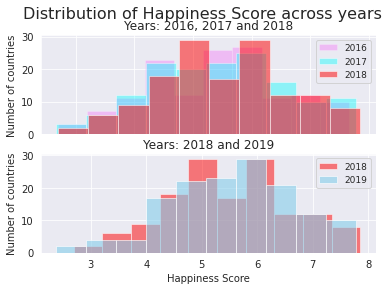

In [ ]:
fig, axis = plt.subplots(2,1)
axis[0].hist(data_2016['Life Ladder'],bins=10,label='2016',alpha=0.2,color='magenta')
axis[0].hist(data_2017['Life Ladder'],bins=10,label='2017',alpha=0.4,color='cyan')
axis[0].hist(data_2018['Life Ladder'],bins=10,label='2018',alpha=0.5,color='red')
axis[0].set_title('Years: 2016, 2017 and 2018')

axis[1].hist(data_2018['Life Ladder'],bins=10,label='2018',alpha=0.5,color='red')
axis[1].hist(data_2019['Life Ladder'],bins=10,label='2019',alpha=0.6,color='skyblue')
axis[1].set_title('Years: 2018 and 2019')

for ax in axis.flat:
  ax.set(xlabel='Happiness Score', ylabel='Number of countries')
for ax in axis.flat:
    ax.label_outer()
axis[0].legend(prop={'size': 9})
axis[1].legend(prop={'size': 9})
fig.suptitle('Distribution of Happiness Score across years',fontsize=16)
plt.show()

Bar Plot for Life Ladder data for year 2019

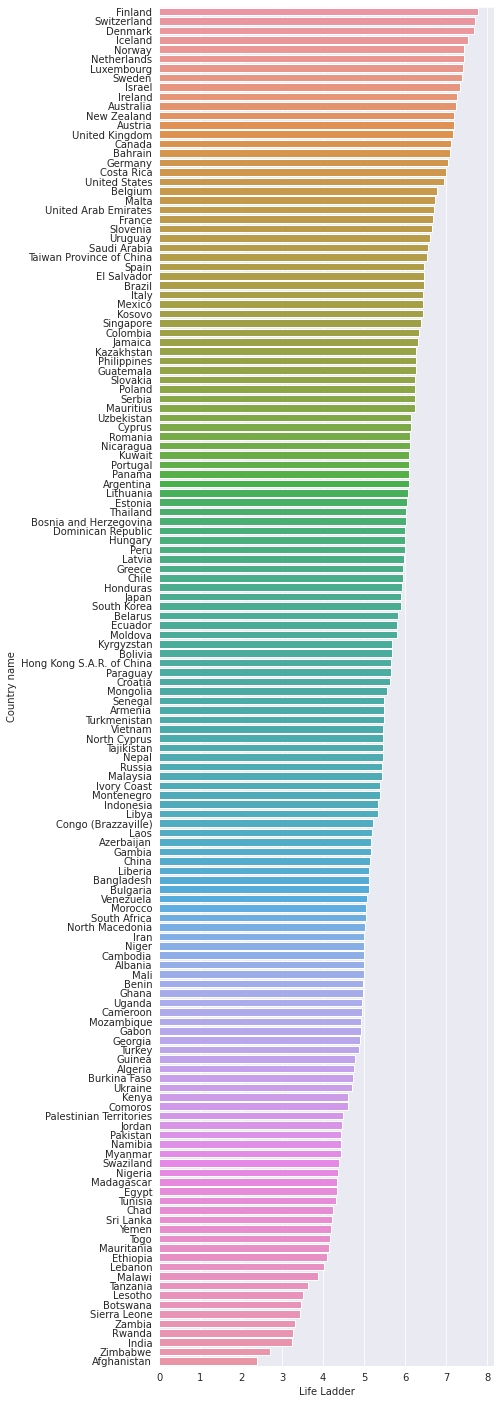

In [ ]:
fig = plt.figure(figsize=(6,25))
result = data_2019.groupby("Country name")["Life Ladder"].sum().sort_values(ascending=False).index.values
sns.barplot(x=data_2019["Life Ladder"], y=data_2019["Country name"], order=result)
plt.show()

Plotting the Correlation Heatmap

[]

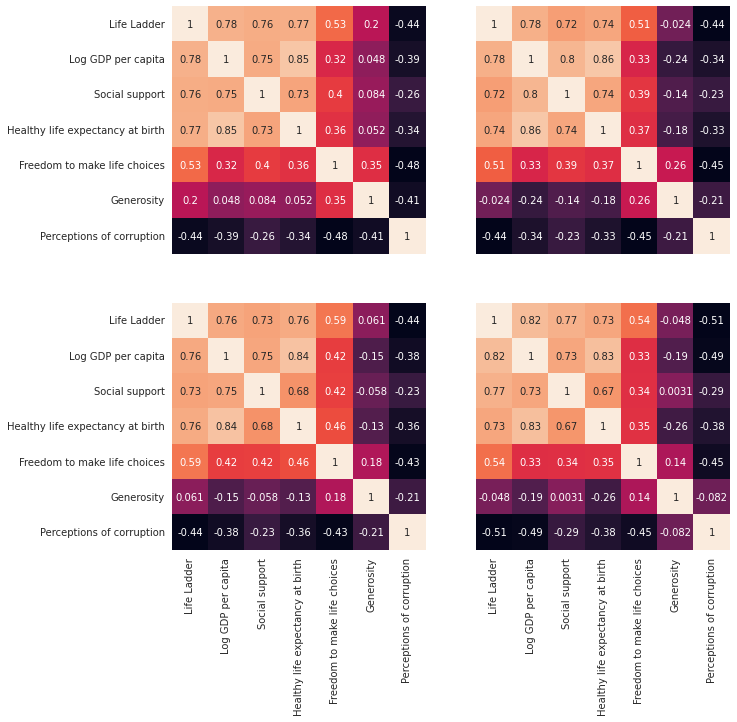

In [ ]:
fig, axs = plt.subplots(2,2,figsize=(10,10))

c1=data_2017.corr(method='pearson')
sns.heatmap(c1,annot=True,cbar=False,ax=axs[0,0])
axs[0,0].set_xticks([])

c2=data_2018.corr(method='pearson')
sns.heatmap(c2,annot=True,cbar=False,ax=axs[0,1])
axs[0,1].set_xticks([])
axs[0,1].set_yticks([])

c3=data_2019.corr(method='pearson')
sns.heatmap(c3,annot=True,cbar=False,ax=axs[1,0])

c4=data_2020.corr(method='pearson')
sns.heatmap(c4,annot=True,cbar=False,ax=axs[1,1])
axs[1,1].set_yticks([])

Plotting Heatmap

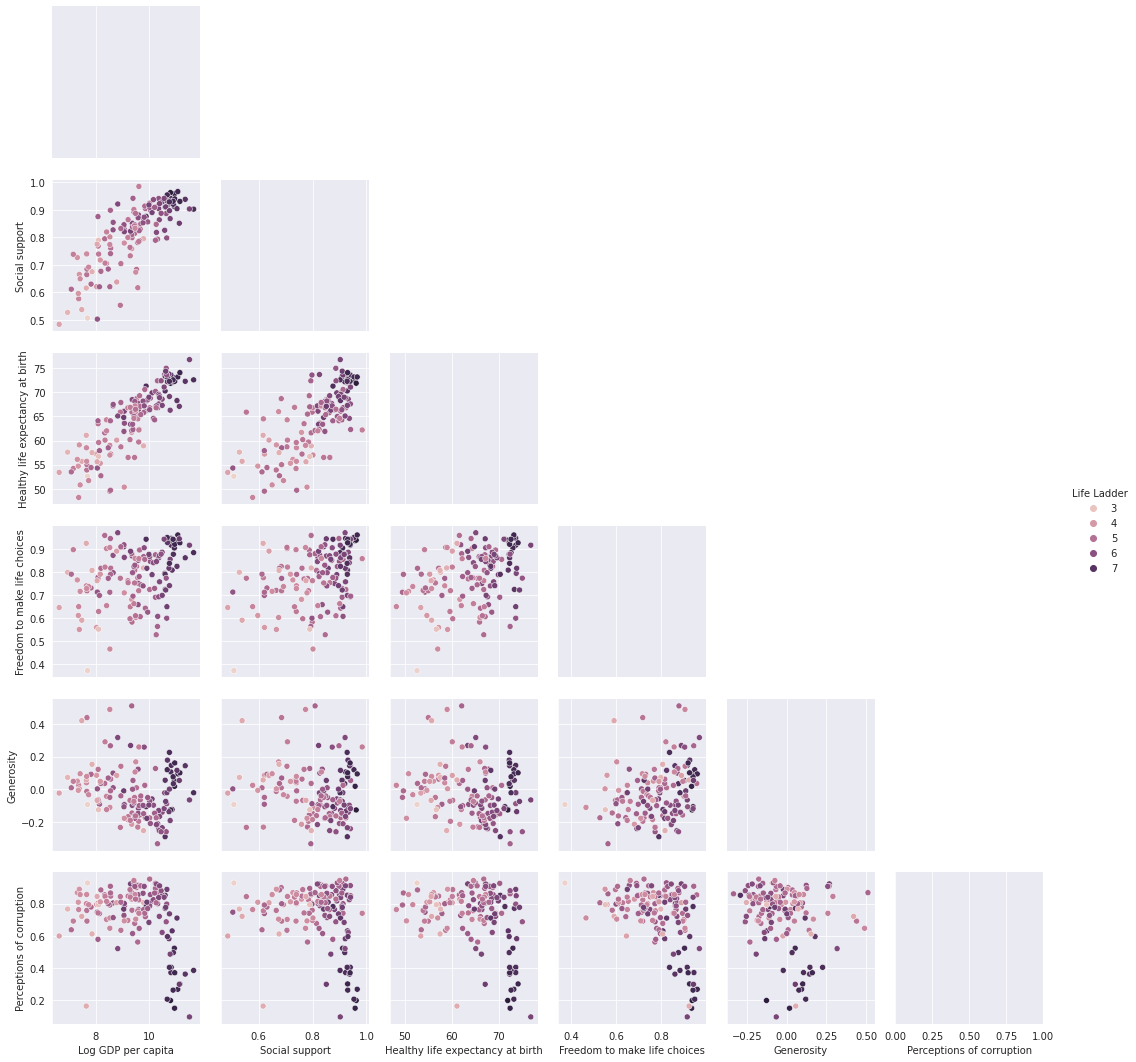

In [ ]:
sns.pairplot(data_2018,corner=True, hue="Life Ladder")
plt.show()

Scatter Plot of Life Ladder vs Log GDP per capita for years 2017,2018,2019,2020

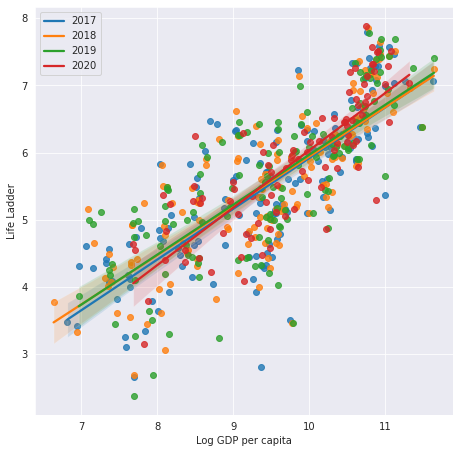

In [ ]:
fig = plt.figure(figsize=(7.5,7.5))
sns.regplot(x=data_2017['Log GDP per capita'],y=data_2017['Life Ladder'])
sns.regplot(x=data_2018['Log GDP per capita'],y=data_2018['Life Ladder'])
sns.regplot(x=data_2019['Log GDP per capita'],y=data_2019['Life Ladder'])
sns.regplot(x=data_2020['Log GDP per capita'],y=data_2020['Life Ladder'])
plt.legend(["2017","2018","2019","2020"])
plt.show()

Scatter Plot of Life Ladder vs Social support for years 2017,2018,2019,2020

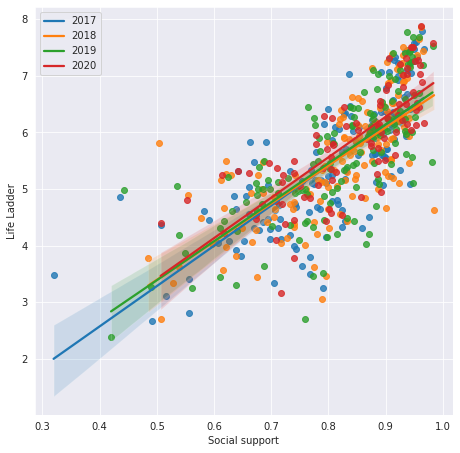

In [ ]:
fig = plt.figure(figsize=(7.5,7.5))
sns.regplot(x=data_2017['Social support'],y=data_2017['Life Ladder'])
sns.regplot(x=data_2018['Social support'],y=data_2018['Life Ladder'])
sns.regplot(x=data_2019['Social support'],y=data_2019['Life Ladder'])
sns.regplot(x=data_2020['Social support'],y=data_2020['Life Ladder'])
plt.legend(["2017","2018","2019","2020"])
plt.show()

Scatter Plot of Life Ladder vs Healthy life expectancy at birth for years 2017,2018,2019,2020

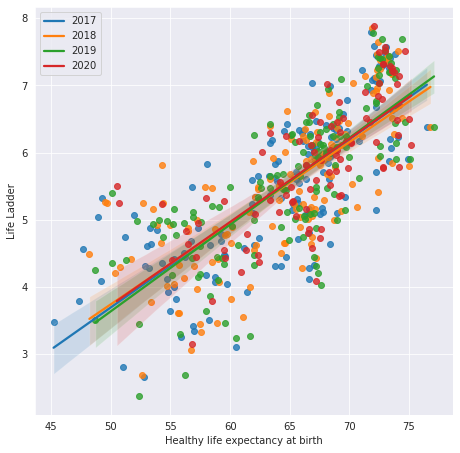

In [ ]:
fig = plt.figure(figsize=(7.5,7.5))
sns.regplot(x=data_2017['Healthy life expectancy at birth'],y=data_2017['Life Ladder'])
sns.regplot(x=data_2018['Healthy life expectancy at birth'],y=data_2018['Life Ladder'])
sns.regplot(x=data_2019['Healthy life expectancy at birth'],y=data_2019['Life Ladder'])
sns.regplot(x=data_2020['Healthy life expectancy at birth'],y=data_2020['Life Ladder'])
plt.legend(["2017","2018","2019","2020"])
plt.show()

Scatter Plot of Life Ladder vs Freedom to make life choices for years 2017,2018,2019,2020

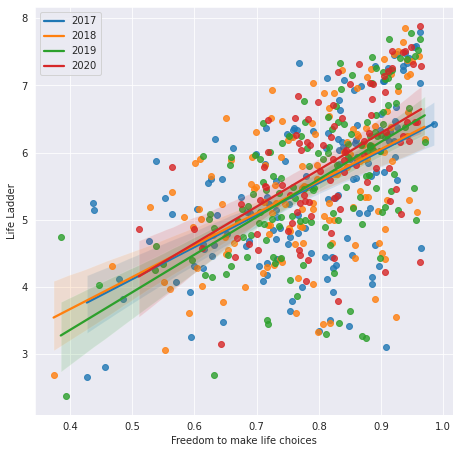

In [ ]:
fig = plt.figure(figsize=(7.5,7.5))
sns.regplot(x=data_2017['Freedom to make life choices'],y=data_2017['Life Ladder'])
sns.regplot(x=data_2018['Freedom to make life choices'],y=data_2018['Life Ladder'])
sns.regplot(x=data_2019['Freedom to make life choices'],y=data_2019['Life Ladder'])
sns.regplot(x=data_2020['Freedom to make life choices'],y=data_2020['Life Ladder'])
plt.legend(["2017","2018","2019","2020"])
plt.show()

Scatter Plot of Life Ladder vs Generosity for years 2017,2018,2019,2020

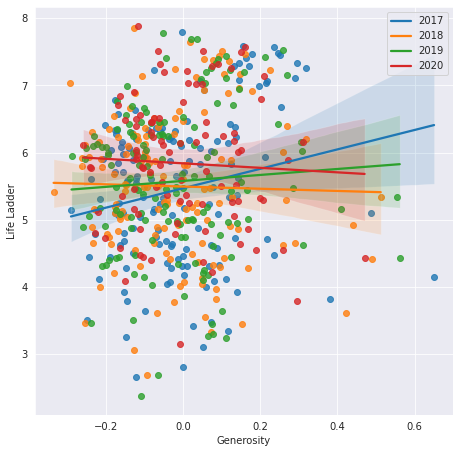

In [ ]:
fig = plt.figure(figsize=(7.5,7.5))
sns.regplot(x=data_2017['Generosity'],y=data_2017['Life Ladder'])
sns.regplot(x=data_2018['Generosity'],y=data_2018['Life Ladder'])
sns.regplot(x=data_2019['Generosity'],y=data_2019['Life Ladder'])
sns.regplot(x=data_2020['Generosity'],y=data_2020['Life Ladder'])
plt.legend(["2017","2018","2019","2020"])
plt.show()

Scatter Plot of Life Ladder vs Perceptions of corruption for years 2017,2018,2019,2020

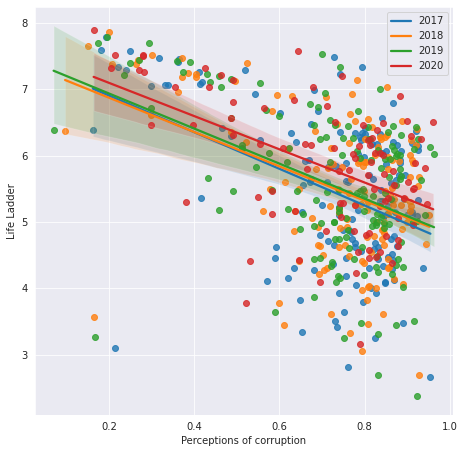

In [ ]:
fig = plt.figure(figsize=(7.5,7.5))
sns.regplot(x=data_2017['Perceptions of corruption'],y=data_2017['Life Ladder'])
sns.regplot(x=data_2018['Perceptions of corruption'],y=data_2018['Life Ladder'])
sns.regplot(x=data_2019['Perceptions of corruption'],y=data_2019['Life Ladder'])
sns.regplot(x=data_2020['Perceptions of corruption'],y=data_2020['Life Ladder'])
plt.legend(["2017","2018","2019","2020"])
plt.show()

**Model Slection**

Importing requirements from scikit learn

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR 
from sklearn.neural_network import MLPRegressor

In [ ]:
data = data.drop(columns=["Country name","year"])

Dataframe for storing performance of all models

In [ ]:
evaluation_table = pd.DataFrame({'Model':[],'Details':[],'RMSE': [],'R-squared-training': [],'R-squared-test':[],'5-Fold Cross Validation':[] })

Multiple Linear Regression with all features

In [ ]:
train_data,test_data = train_test_split(data,train_size = 0.8,random_state=3)

independent_variable = ['Log GDP per capita',	'Social support',	'Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity',	'Perceptions of corruption']
lin_regression = LinearRegression()
lin_regression.fit(train_data[independent_variable],train_data['Life Ladder'])

y_pred=lin_regression.predict(test_data[independent_variable])
rmse = float(format(np.sqrt(mean_squared_error(test_data['Life Ladder'],y_pred)),'.4f'))
cross_val = float(format(cross_val_score(lin_regression,data[independent_variable],data['Life Ladder'],cv=5).mean(),'.4f'))
rsquared_train = float(format(lin_regression.score(train_data[independent_variable],train_data['Life Ladder']),'.4f'))
rsquared_test = float(format(lin_regression.score(test_data[independent_variable],test_data['Life Ladder']),'.4f'))
evaluation_table.loc[0] = ['Multiple Linear Regression','All features',rmse,rsquared_train,rsquared_test,cross_val]                     

Multiple Linear Regression with the most linearly correlated features viz. Log GDP per capita, Social support,	and Healthy life expectancy at birth

In [ ]:
train_data,test_data = train_test_split(data,train_size = 0.8,random_state=3)

independent_variable = ['Log GDP per capita',	'Social support',	'Healthy life expectancy at birth']
lin_regression_2 = LinearRegression()
lin_regression_2.fit(train_data[independent_variable],train_data['Life Ladder'])

y_pred=lin_regression_2.predict(test_data[independent_variable])
rmse = float(format(np.sqrt(mean_squared_error(test_data['Life Ladder'],y_pred)),'.4f'))
cross_val = float(format(cross_val_score(lin_regression_2,data[independent_variable],data['Life Ladder'],cv=5).mean(),'.4f'))
rsquared_train = float(format(lin_regression_2.score(train_data[independent_variable],train_data['Life Ladder']),'.4f'))
rsquared_test = float(format(lin_regression_2.score(test_data[independent_variable],test_data['Life Ladder']),'.4f'))
evaluation_table.loc[1] = ['Multiple Linear Regression','Top 3 features',rmse,rsquared_train,rsquared_test,cross_val]                 

Lasso Regression

In [ ]:
train_data,test_data = train_test_split(data,train_size = 0.8,random_state=3)

independent_variable = ['Log GDP per capita',	'Social support',	'Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity',	'Perceptions of corruption']
lr = [1e-5,1e-4,1e-3,1e-2,1e-1,1,10,100,1000,10000,100000]
lr = enumerate(lr)
best_lr = 0
best_cross_val = 0
for i,j in lr:
    Lasso_regression = Lasso(alpha=j)
    Lasso_regression.fit(train_data[independent_variable],train_data['Life Ladder'])
    y_pred=Lasso_regression.predict(test_data[independent_variable])
    cross_val = float(format(cross_val_score(Lasso_regression,data[independent_variable],data['Life Ladder'],cv=5).mean(),'.4f'))
    if cross_val > best_cross_val:
      best_cross_val = cross_val
      best_lr = j

Lasso_regression = Lasso(alpha=best_lr)
Lasso_regression.fit(train_data[independent_variable],train_data['Life Ladder'])
rmse = float(format(np.sqrt(mean_squared_error(test_data['Life Ladder'],y_pred)),'.4f'))
rsquared_train = float(format(Lasso_regression.score(train_data[independent_variable],train_data['Life Ladder']),'.4f'))
rsquared_test = float(format(Lasso_regression.score(test_data[independent_variable],test_data['Life Ladder']),'.4f'))
evaluation_table.loc[2] = ['Lasso Regression',f'alpha = {best_lr}',rmse,rsquared_train,rsquared_test,best_cross_val] 
evaluation_table                    

,Model,Details,RMSE,R-squared-training,R-squared-test,5-Fold Cross Validation
0,Multiple Linear Regression,All features,0.5396,0.7286,0.7889,0.7214
1,Multiple Linear Regression,Top 3 features,0.5947,0.6738,0.7436,0.6740
2,Lasso Regression,alpha = 0.001,1.1747,0.7285,0.7883,0.7217


Ridge Regression

In [ ]:
train_data,test_data = train_test_split(data,train_size = 0.8,random_state=3)

independent_variable = ['Log GDP per capita',	'Social support',	'Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity',	'Perceptions of corruption']
lr = [1e-5,1e-4,1e-3,1e-2,1e-1,1,10,100,1000,10000,100000]
lr = enumerate(lr)
best_lr = 0
best_cross_val = 0
for i,j in lr:
    Ridge_regression = Ridge(alpha=j)
    Ridge_regression.fit(train_data[independent_variable],train_data['Life Ladder'])
    y_pred=Ridge_regression.predict(test_data[independent_variable])
    cross_val = float(format(cross_val_score(Ridge_regression,data[independent_variable],data['Life Ladder'],cv=5).mean(),'.4f'))
    if cross_val > best_cross_val:
      best_cross_val = cross_val
      best_lr = j

Ridge_regression = Ridge(alpha=best_lr)
Ridge_regression.fit(train_data[independent_variable],train_data['Life Ladder'])
rmse = float(format(np.sqrt(mean_squared_error(test_data['Life Ladder'],y_pred)),'.4f'))
rsquared_train = float(format(Ridge_regression.score(train_data[independent_variable],train_data['Life Ladder']),'.4f'))
rsquared_test = float(format(Ridge_regression.score(test_data[independent_variable],test_data['Life Ladder']),'.4f'))
evaluation_table.loc[3] = ['Ridge Regression',f'alpha = {best_lr}',rmse,rsquared_train,rsquared_test,best_cross_val]
evaluation_table                    

,Model,Details,RMSE,R-squared-training,R-squared-test,5-Fold Cross Validation
0,Multiple Linear Regression,All features,0.5396,0.7286,0.7889,0.7214
1,Multiple Linear Regression,Top 3 features,0.5947,0.6738,0.7436,0.6740
2,Lasso Regression,alpha = 0.001,1.1747,0.7285,0.7883,0.7217
3,Ridge Regression,alpha = 1,0.9071,0.7284,0.7883,0.7220


Elastic Net

In [ ]:
train_data,test_data = train_test_split(data,train_size = 0.8,random_state=3)

independent_variable = ['Log GDP per capita',	'Social support',	'Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity',	'Perceptions of corruption']
lr = [1e-5,1e-4,1e-3,1e-2,1e-1,1,10,100,1000,10000,100000]
lr = enumerate(lr)
best_lr = 0  
best_cross_val = 0
for i,j in lr:
    ElasticNet_regression = ElasticNet(alpha=j)
    ElasticNet_regression.fit(train_data[independent_variable],train_data['Life Ladder'])
    y_pred=ElasticNet_regression.predict(test_data[independent_variable])
    cross_val = float(format(cross_val_score(ElasticNet_regression,data[independent_variable],data['Life Ladder'],cv=5).mean(),'.4f'))
    if cross_val > best_cross_val:
      best_cross_val = cross_val
      best_lr = j

ElasticNet_regression = ElasticNet(alpha=best_lr)
ElasticNet_regression.fit(train_data[independent_variable],train_data['Life Ladder'])
rmse = float(format(np.sqrt(mean_squared_error(test_data['Life Ladder'],y_pred)),'.4f'))
rsquared_train = float(format(ElasticNet_regression.score(train_data[independent_variable],train_data['Life Ladder']),'.4f'))
rsquared_test = float(format(ElasticNet_regression.score(test_data[independent_variable],test_data['Life Ladder']),'.4f'))
evaluation_table.loc[4] = ['ElasticNet Regression',f'alpha = {best_lr}',rmse,rsquared_train,rsquared_test,best_cross_val]
evaluation_table                    

,Model,Details,RMSE,R-squared-training,R-squared-test,5-Fold Cross Validation
0,Multiple Linear Regression,All features,0.5396,0.7286,0.7889,0.7214
1,Multiple Linear Regression,Top 3 features,0.5947,0.6738,0.7436,0.6740
2,Lasso Regression,alpha = 0.001,1.1747,0.7285,0.7883,0.7217
3,Ridge Regression,alpha = 1,0.9071,0.7284,0.7883,0.7220
4,ElasticNet Regression,alpha = 0.001,1.1747,0.7283,0.7881,0.7220


SVR

In [ ]:
svr_kernels_C = {'rbf':10000,'linear':0.1,'poly':100}

for k,kernel in enumerate(list(svr_kernels_C.keys())):
  svr_model = SVR(kernel=kernel, C=svr_kernels_C[kernel])
  svr_model.fit(train_data[independent_variable],train_data['Life Ladder'])

  cross_val = float(format(cross_val_score(svr_model,data[independent_variable],data['Life Ladder'],cv=5).mean(),'.4f'))
  rmse = float(format(np.sqrt(mean_squared_error(test_data['Life Ladder'],y_pred)),'.4f'))
  rsquared_train = float(format(svr_model.score(train_data[independent_variable],train_data['Life Ladder']),'.4f'))
  rsquared_test = float(format(svr_model.score(test_data[independent_variable],test_data['Life Ladder']),'.4f'))

  evaluation_table.loc[5+k] = [f'SVR(kernel={kernel})',f'C = {svr_kernels_C[kernel]}',rmse,rsquared_train,rsquared_test,cross_val] 
evaluation_table   


,Model,Details,RMSE,R-squared-training,R-squared-test,5-Fold Cross Validation
0,Multiple Linear Regression,All features,0.5396,0.7286,0.7889,0.7214
1,Multiple Linear Regression,Top 3 features,0.5947,0.6738,0.7436,0.6740
2,Lasso Regression,alpha = 0.001,1.1747,0.7285,0.7883,0.7217
3,Ridge Regression,alpha = 1,0.9071,0.7284,0.7883,0.7220
4,ElasticNet Regression,alpha = 0.001,1.1747,0.7283,0.7881,0.7220
5,SVR(kernel=rbf),C = 10000,1.1747,0.7576,0.8163,0.7447
6,SVR(kernel=linear),C = 0.1,1.1747,0.7239,0.7858,0.7217
7,SVR(kernel=poly),C = 100,1.1747,0.7450,0.8013,0.7420


Neural Network (MLP Regressor)

In [ ]:
train_data,test_data = train_test_split(data,train_size = 0.8,random_state=3)

independent_variable = ['Log GDP per capita',	'Social support',	'Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity',	'Perceptions of corruption']
solver = ['lbfgs', 'adam']
for i,j in enumerate(solver):
    NeuralNet = MLPRegressor(solver=j, alpha=1e-5,hidden_layer_sizes=(10,5),max_iter=10000, random_state=1)
    NeuralNet.fit(train_data[independent_variable],train_data['Life Ladder'])
    y_pred=NeuralNet.predict(test_data[independent_variable])
    cross_val = float(format(cross_val_score(NeuralNet,data[independent_variable],data['Life Ladder'],cv=5).mean(),'.4f'))
    rmse = float(format(np.sqrt(mean_squared_error(test_data['Life Ladder'],y_pred)),'.4f'))
    rsquared_train = float(format(NeuralNet.score(train_data[independent_variable],train_data['Life Ladder']),'.4f'))
    rsquared_test = float(format(NeuralNet.score(test_data[independent_variable],test_data['Life Ladder']),'.4f'))
    evaluation_table.loc[8+i] = ['Neural Net',j,rmse,rsquared_train,rsquared_test,cross_val]
evaluation_table
evaluation_table.to_excel('table.xlsx')

We conclude that the best model is SVR with kernel=rbf and C = 10000

**Predicting Life Ladder for 2020 for the missing countries**

In [ ]:
prediction_data = pd.read_excel("https://happiness-report.s3.amazonaws.com/2021/DataForFigure2.1WHR2021C2.xls")
prediction_data

In [ ]:
prediction_data=prediction_data.drop(columns=['Regional indicator','Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
                                              'Ladder score in Dystopia','Explained by: Log GDP per capita','Explained by: Social support',
                                              'Explained by: Healthy life expectancy','Explained by: Freedom to make life choices',
                                              'Explained by: Generosity','Explained by: Perceptions of corruption','Dystopia + residual'])

In [ ]:
prediction_data.rename(columns={"Logged GDP per capita": "Log GDP per capita", "Healthy life expectancy": "Healthy life expectancy at birth"},inplace=True)

Applying our best trained model trained on previous data

In [ ]:
model = SVR(kernel='rbf', C=10000)
independent_variable = ['Log GDP per capita',	'Social support',	'Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity',	'Perceptions of corruption']
model.fit(data[independent_variable],data['Life Ladder'])
# predicted_ladder_score = model.predict(prediction_data[independent_variable])

Identifying countries for which Life Ladder was missing in previous data

In [ ]:
data = pd.read_excel("https://happiness-report.s3.amazonaws.com/2021/DataPanelWHR2021C2.xls")
countries_2020=data.groupby("year")["Country name"].apply(list)[2020]
all_countries=data["Country name"].unique()
countries_not_in_2020 = [country for country in all_countries if country not in countries_2020]
countries_not_in_2020

In [ ]:
prediction_data = prediction_data[prediction_data['Country name'].isin(countries_not_in_2020)]

Doing the prediction for countries with unknown Ladder Scores in 2020

In [ ]:
predicted_ladder_score = model.predict(prediction_data[independent_variable])
prediction_data.insert(2,"Predicted Ladder Score", predicted_ladder_score)

In [ ]:
prediction_data

,Country name,Ladder score,Predicted Ladder Score,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption
7,Luxembourg,7.3244,7.347913,11.646564,0.907790,72.599998,0.907180,-0.033566,0.386419
15,Costa Rica,7.0694,6.301200,9.879919,0.891308,71.399925,0.934432,-0.126469,0.808753
29,Guatemala,6.4345,5.519534,9.053408,0.813291,64.958138,0.905815,-0.037601,0.775324
31,Singapore,6.3765,7.237550,11.488009,0.914899,76.952858,0.927198,-0.018427,0.081959
36,Jamaica,6.3092,5.812892,9.186201,0.876502,67.500000,0.889583,-0.136797,0.884409
40,Panama,6.1796,6.347173,10.350155,0.895877,69.652107,0.871880,-0.166286,0.855688
41,Uzbekistan,6.1788,6.102218,8.836421,0.918469,65.255310,0.970131,0.310706,0.515089
45,Romania,6.1400,5.885584,10.283731,0.831914,67.355209,0.845042,-0.219464,0.938272
46,Kuwait,6.1061,6.211132,10.816696,0.842784,66.900002,0.867090,-0.104161,0.736238
54,Nicaragua,5.9721,5.675199,8.620266,0.863976,67.656532,0.835818,0.019604,0.663591


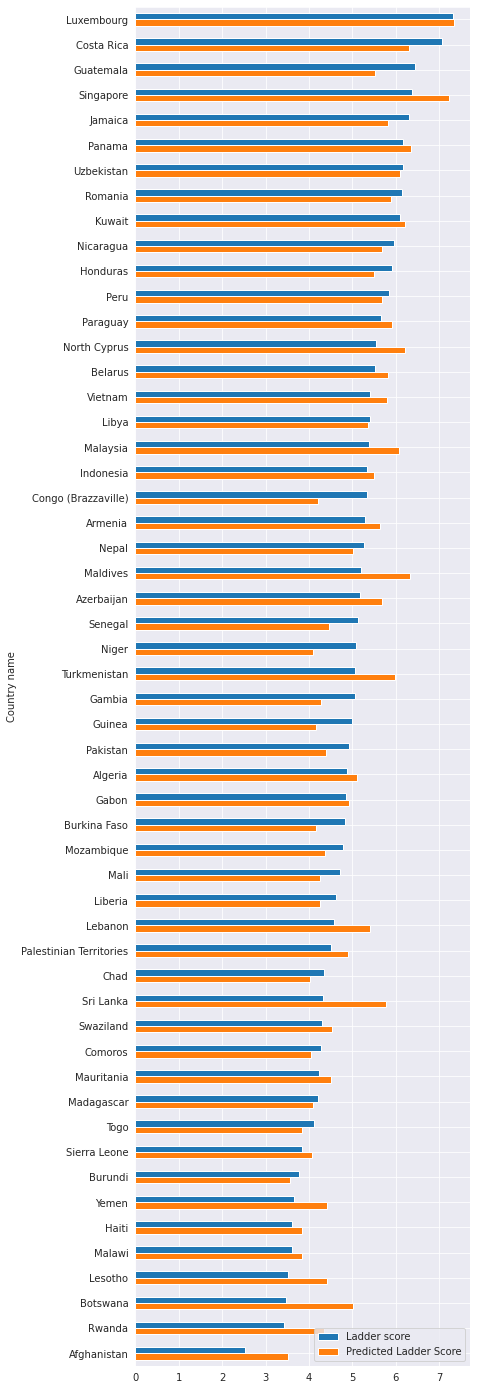

In [ ]:
fig,ax = plt.subplots(figsize=(6,25))
prediction_data.plot(x="Country name" , y=["Ladder score","Predicted Ladder Score"], kind="barh", ax=ax).invert_yaxis()
plt.show()